In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [6]:
df.drop(['url','address','phone','reviews_list'],axis=1,inplace=True)

In [7]:
#remove duplicates from dataset
df.drop_duplicates(inplace=True)
df.shape

(51630, 13)

In [8]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7759
votes                              0
location                          21
rest_type                        227
dish_liked                     28026
cuisines                          45
approx_cost(for two people)      344
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def cleanRate(s):
    if(s=='NEW' or s=="-"):
        return np.nan
    
    else:
        s=str(s).split('/')
        s=s[0]
        return float(s)

In [11]:
df['rate'] = df['rate'].apply(cleanRate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
## replace missing values of rate with mean
df['rate'].fillna(df['rate'].mean().round(1),inplace=True)
df.rate.isna().sum()

0

In [13]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [14]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'menu_item', 'type',
       'city'],
      dtype='object')

In [15]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
df['cost']=df['cost'].str.replace(',','')
df.cost = df.cost.astype(float)

In [17]:
df['dish_liked'].mode()

0    Biryani
Name: dish_liked, dtype: object

In [18]:
df['dish_liked'].fillna('Biryani',inplace=True)
df['dish_liked'].isna().sum()

0

In [19]:
df.isna().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location         21
rest_type       227
dish_liked        0
cuisines         45
cost            344
menu_item         0
type              0
city              0
dtype: int64

In [20]:
## drop everything less than 1000
df.dropna(inplace=True)

In [21]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
menu_item       0
type            0
city            0
dtype: int64

In [22]:
df.shape

(51063, 13)

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


## Analysis

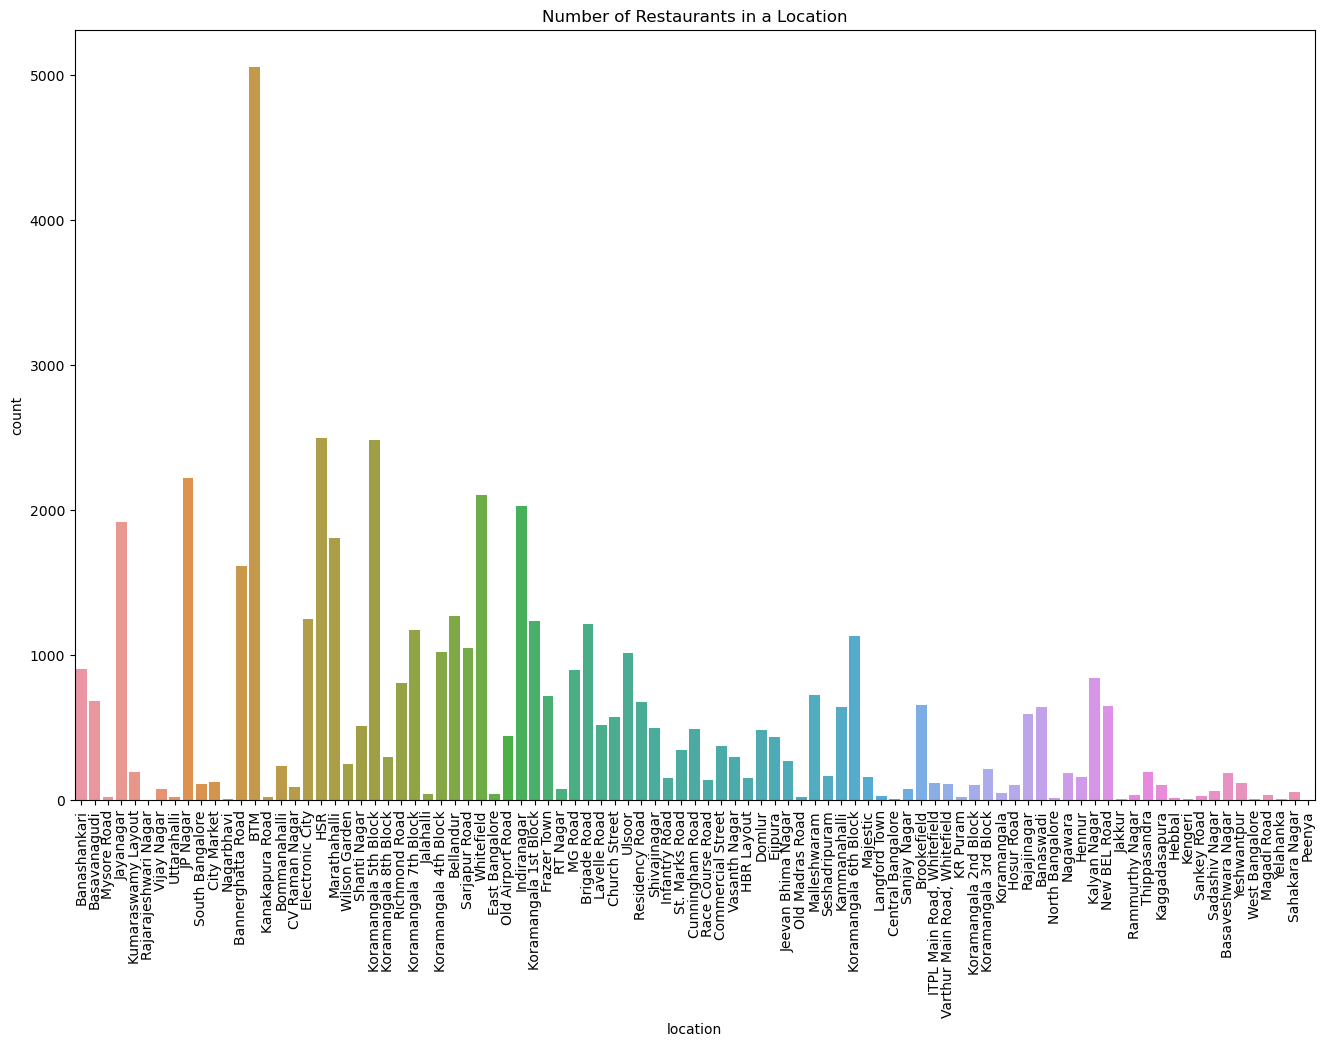

In [24]:
plt.figure(figsize=(16,10))
sns.countplot(x=df['location'])
plt.title('Number of Restaurants in a Location')
plt.xticks(rotation=90);

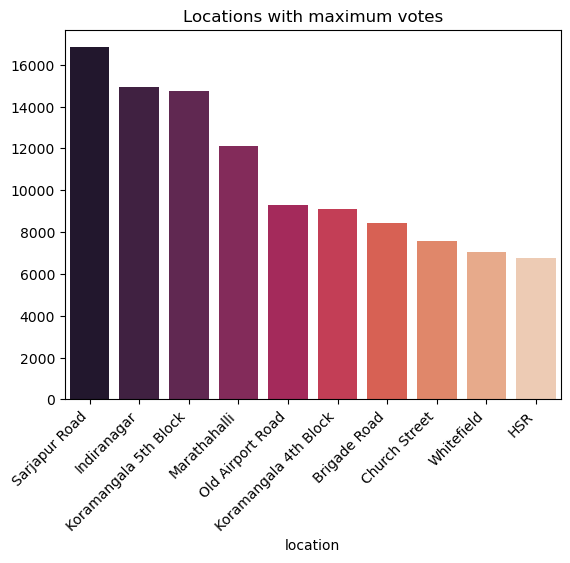

In [39]:
top_votes= df.groupby('location')['votes'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('Locations with maximum votes');

/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aniketgaldhar/Desktop/ml/ineuron/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


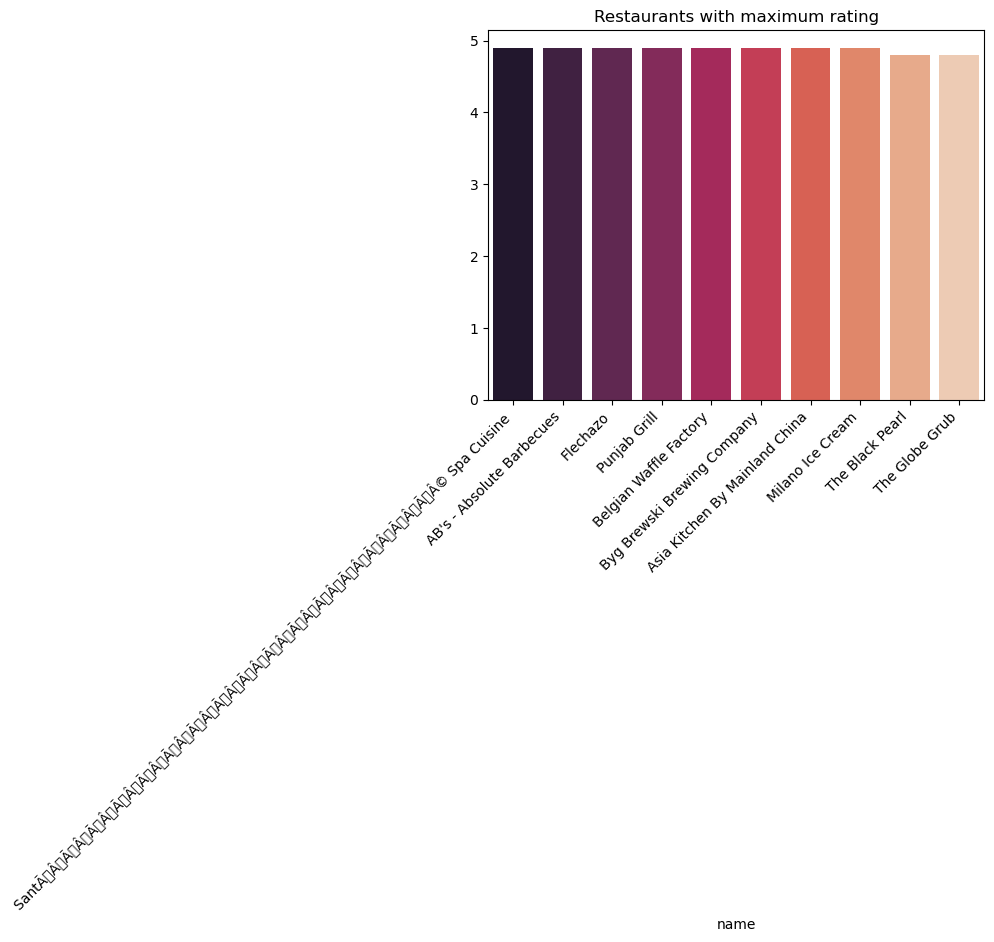

In [35]:
top_votes= df.groupby('name')['rate'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('Restaurants with maximum rating');

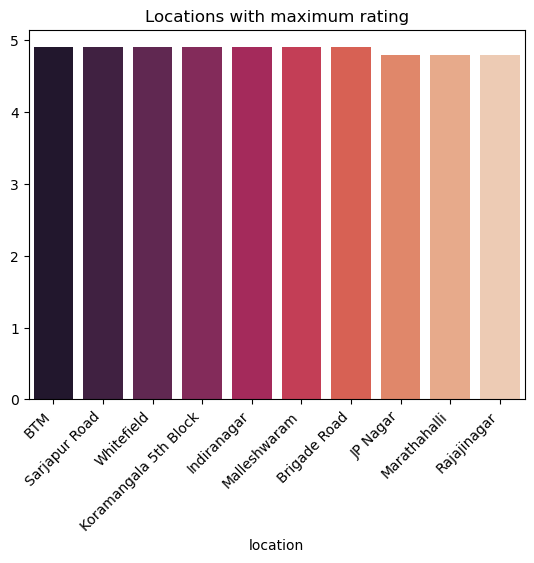

In [40]:
top_votes= df.groupby('location')['rate'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('Locations with maximum rating');

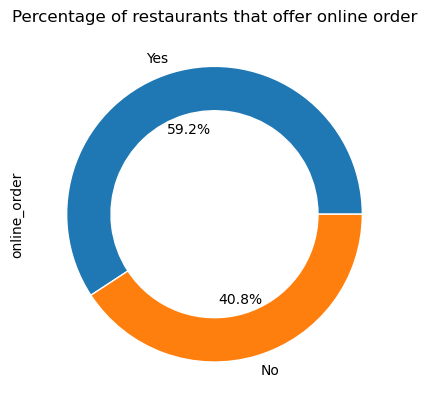

In [26]:
df["online_order"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that offer online order');

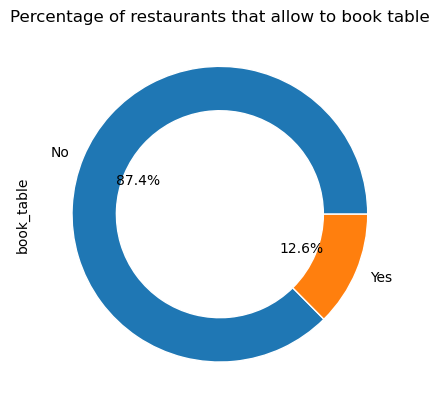

In [27]:
df["book_table"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that allow to book table');

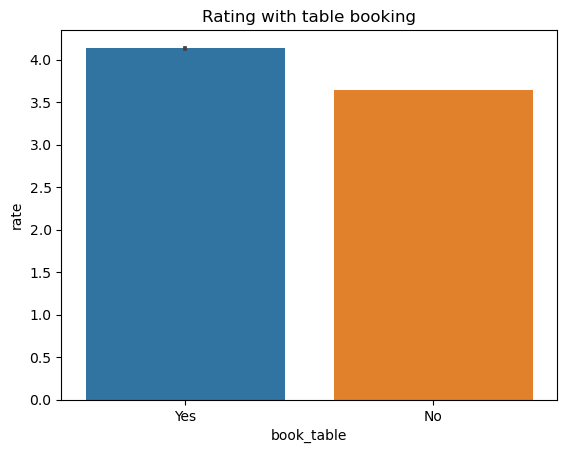

In [32]:
sns.barplot(x=df['book_table'], y=df['rate'])
plt.title('Rating with table booking');

Text(0.5, 1.0, 'Cost with table booking')

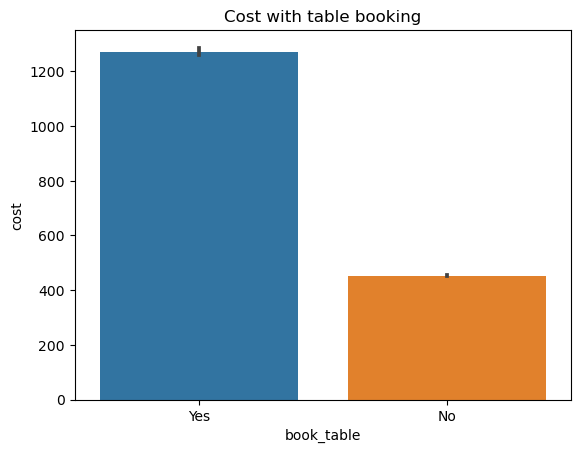

In [33]:
sns.barplot(x=df['book_table'], y=df['cost'])
plt.title('Cost with table booking');

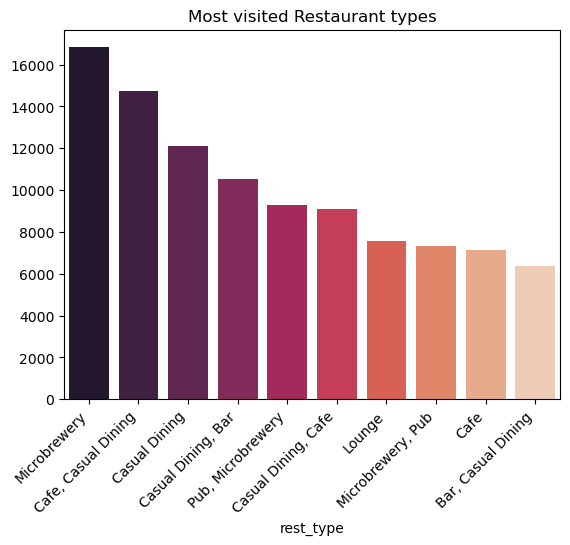

In [41]:
top_votes= df.groupby('rest_type')['votes'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('Most visited Restaurant types');

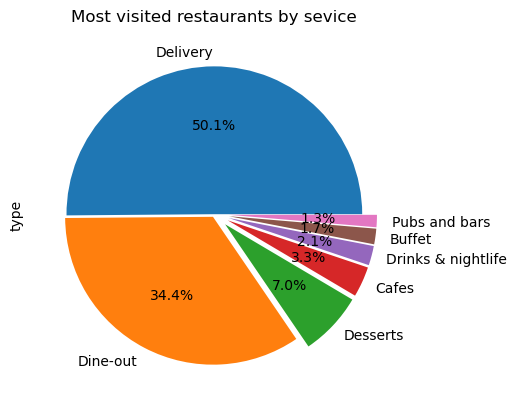

In [45]:
df["type"].value_counts().plot(kind="pie", autopct="%.1f%%",explode=[0,0.02,0.1,0.1,0.1,0.1,0.1])
plt.title('Most visited restaurants by sevice');

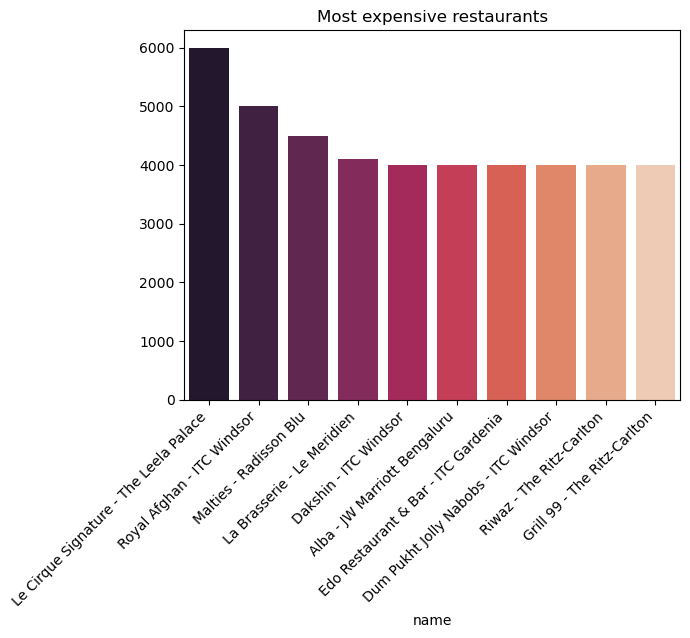

In [52]:
top_votes= df.groupby('name')['cost'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('Most expensive restaurants');

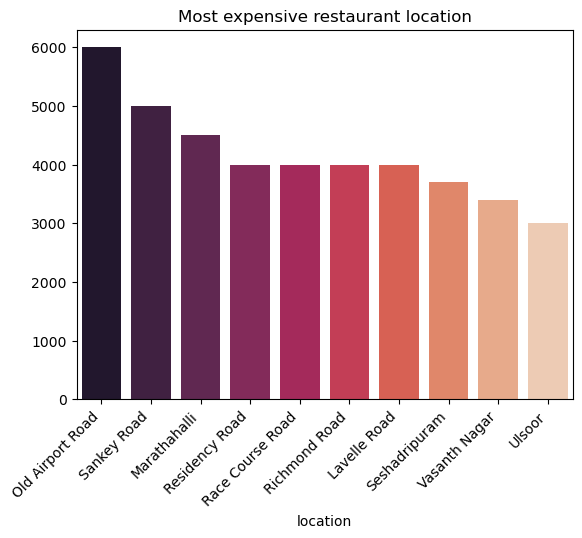

In [54]:
top_votes= df.groupby('location')['cost'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('Most expensive restaurant location');

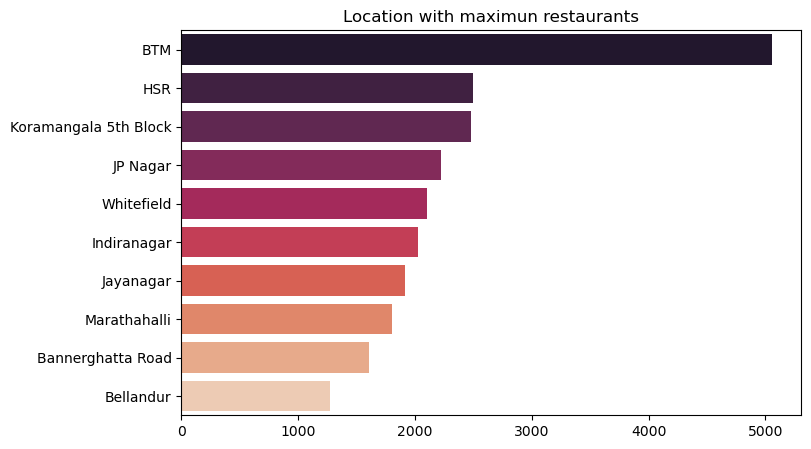

In [51]:
top_rest=df.location.value_counts(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rest.values, y=top_rest.index,palette="rocket")
plt.title('Location with maximun restaurants');

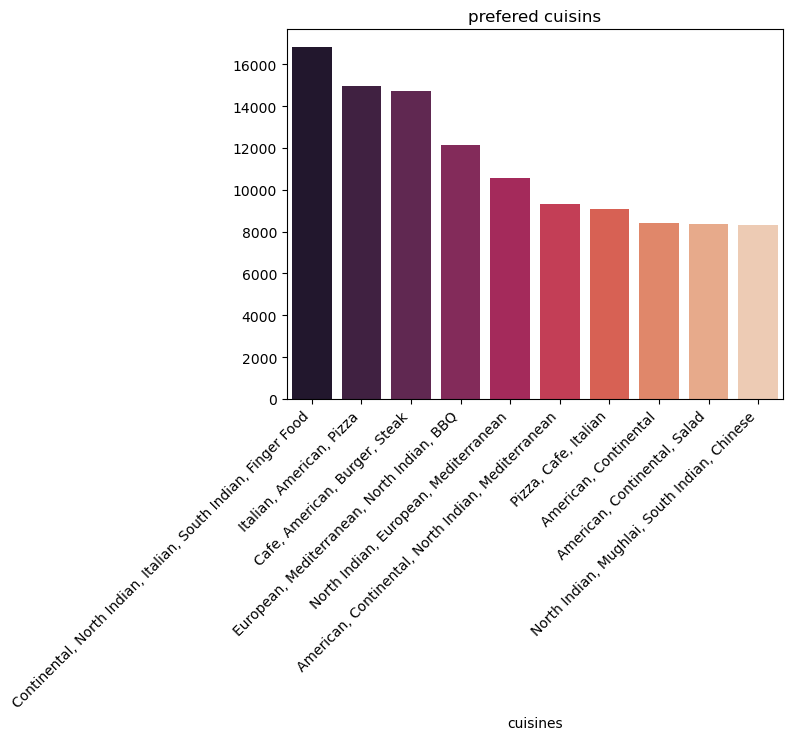

In [56]:
top_votes= df.groupby('cuisines')['votes'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="rocket" )
plt.xticks(rotation=45,ha='right')
plt.title('prefered cuisins');

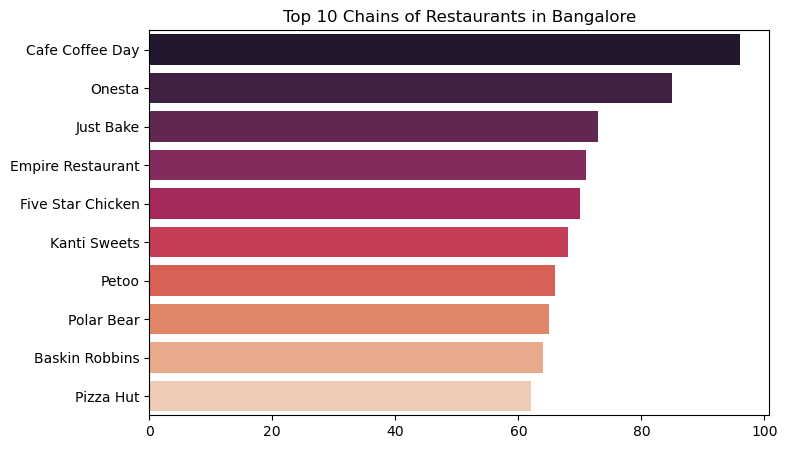

In [49]:
top_rest=df.name.value_counts(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rest.values, y=top_rest.index,palette="rocket",)
plt.title('Top 10 Chains of Restaurants in Bangalore');

## Inferences

* 60% restaurants offer online orders and 40% dont.
* 87% restaurants allow to book table and 13% dont.
* Cost of restaurants that allow booking tabel average above 1200 and restaurants that dont allow table booking average 450.
* Locations with maximum restaurants include BTM, HSR, Koramangala 5th block etc.
* Most visited restaurant locations include sarajpur nagar, indiranagar, koramangala 5th block, marathahalli etc.
* Old Airport road, sankey road, marathahalli are the most expensive restaurant locations
* microberry, cafe and casual dining are the most preferred restaurant types.
* Delivery and Dine out most popular services
* Leela palace, Royal Afgan, malties and le-meredian are the most expensive restaurants
* Cafe Cofee Day, onesta, just bake, empire restaurants are the most famous chains.
* North and south Indian, continental and italian are most famous cuisines